NPTEL - Quantum Mechanics and Applications

Ajoy Ghatak

IIT Delhi

# Bra-Ket Algebra

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sympy as sp
sp.init_printing(use_unicode=True)

In [2]:
hcut, w = sp.symbols('hbar omega')

Functions:
- 

Variables:
- 

## Harmonic Oscillator

Lecture 28

For Harmonic Oscillator:

- $E_n \quad \implies \quad$  **`Enosc_n(n)`**

- $<m|H|n> \quad \implies \quad$  **`m_H_osc_n(m, n)`**

- $H$ matrix $ (N \times N) \quad \implies \quad$ **`H_osc(N)`**

In [3]:
Enosc_n = lambda n: (n + 1/2) *hcut*w

def m_H_osc_n(m, n):
    if m==n:
        return Enosc_n(m)
    else:
        return 0

H_osc = lambda N: sp.Matrix(N, N, m_H_osc_n)
display(Enosc_n(3), m_H_osc_n(2,2), m_H_osc_n(2,3), H_osc(4),
        H_osc(4).eigenvects())

⎡0.5⋅h̅⋅ω     0        0        0   ⎤
⎢                                  ⎥
⎢   0     1.5⋅h̅⋅ω     0        0   ⎥
⎢                                  ⎥
⎢   0        0     2.5⋅h̅⋅ω     0   ⎥
⎢                                  ⎥
⎣   0        0        0     3.5⋅h̅⋅ω⎦

⎡⎛            ⎡⎡1.0⎤⎤⎞  ⎛            ⎡⎡ 0 ⎤⎤⎞  ⎛            ⎡⎡ 0 ⎤⎤⎞  ⎛       
⎢⎜            ⎢⎢   ⎥⎥⎟  ⎜            ⎢⎢   ⎥⎥⎟  ⎜            ⎢⎢   ⎥⎥⎟  ⎜       
⎢⎜            ⎢⎢ 0 ⎥⎥⎟  ⎜            ⎢⎢1.0⎥⎥⎟  ⎜            ⎢⎢ 0 ⎥⎥⎟  ⎜       
⎢⎜0.5⋅h̅⋅ω, 1, ⎢⎢   ⎥⎥⎟, ⎜1.5⋅h̅⋅ω, 1, ⎢⎢   ⎥⎥⎟, ⎜2.5⋅h̅⋅ω, 1, ⎢⎢   ⎥⎥⎟, ⎜3.5⋅
⎢⎜            ⎢⎢ 0 ⎥⎥⎟  ⎜            ⎢⎢ 0 ⎥⎥⎟  ⎜            ⎢⎢1.0⎥⎥⎟  ⎜       
⎢⎜            ⎢⎢   ⎥⎥⎟  ⎜            ⎢⎢   ⎥⎥⎟  ⎜            ⎢⎢   ⎥⎥⎟  ⎜       
⎣⎝            ⎣⎣ 0 ⎦⎦⎠  ⎝            ⎣⎣ 0 ⎦⎦⎠  ⎝            ⎣⎣ 0 ⎦⎦⎠  ⎝       

     ⎡⎡ 0 ⎤⎤⎞⎤
     ⎢⎢   ⎥⎥⎟⎥
     ⎢⎢ 0 ⎥⎥⎟⎥
h̅⋅ω, 1, ⎢⎢   ⎥⎥⎟⎥
     ⎢⎢ 0 ⎥⎥⎟⎥
     ⎢⎢   ⎥⎥⎟⎥
     ⎣⎣1.0⎦⎦⎠⎦

## Spherical Harmonics
$$ Y_n^m(\theta, \varphi) = \sqrt{\frac{(2n+1)(n-m)!}{4\pi(n+m)!}} \,
            \exp(i m \varphi) \, \mathrm{P}_n^m\left(\cos(\theta)\right) $$

In [4]:
theta, phi = sp.symbols('theta phi', positive=True)

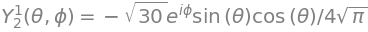

In [5]:
l, m = 2, 1  # input
display(sp.Eq(sp.Ynm(l,m,theta,phi),
        sp.Ynm(l, m, theta, phi).expand(func=True)))

$$ \overline{Y_n^m(\theta, \varphi)} := (-1)^m Y_n^{-m}(\theta, \varphi) $$

In [6]:
sp.Ynm_c

<function sympy.functions.special.spherical_harmonics.Ynm_c(n, m, theta, phi)>

## Theory of Angular Momentum

In [7]:
import sympy.physics.paulialgebra as sppauli
import sympy.physics.matrices as spphmat

Pauli Spin Matrices:

- $\sigma^2 \quad \implies \quad$ **`sig2`**, **`sig2val`**, **`sig21vec`**, **`sig22vec`**

- $\sigma_x \quad \implies \quad$ **`sigx`**, **`sigx1val`**, **`sigx1vec`**, **`sigx2val`**, **`sigx2vec`**

- $\sigma_y \quad \implies \quad$ **`sigy`**, **`sigy1val`**, **`sigy1vec`**, **`sigy2val`**, **`sigy2vec`**

- $\sigma_z \quad \implies \quad$ **`sigz`**, **`sigz1val`**, **`sigz1vec`**, **`sigz2val`**, **`sigz2vec`**

- $\sigma_+ \quad \implies \quad$ **`sig_plus`**
- $\sigma_- \quad \implies \quad$ **`sig_minus`**

- **`J2`**, **`Jx`**, **`Jy`**, **`Jz`**, **`J_plus`**, **`J_minus`**

Commutator function: **`commutator_fn(A, B)`**

In [8]:
def commutator_fn(A, B):
    return A*B - B*A

In [9]:
sigx, sigy, sigz = [spphmat.msigma(i) for i in range(1,4)]
sig_plus, sig_minus = (sigx +sp.I*sigy)/2, (sigx -sp.I*sigy)/2
sig2 = sp.eye(2)
sig2, (sigx, sigy, sigz), (sig_plus, sig_minus)

⎛⎡1  0⎤  ⎛⎡0  1⎤  ⎡0  -ⅈ⎤  ⎡1  0 ⎤⎞  ⎛⎡0  1⎤  ⎡0  0⎤⎞⎞
⎜⎢    ⎥, ⎜⎢    ⎥, ⎢     ⎥, ⎢     ⎥⎟, ⎜⎢    ⎥, ⎢    ⎥⎟⎟
⎝⎣0  1⎦  ⎝⎣1  0⎦  ⎣ⅈ  0 ⎦  ⎣0  -1⎦⎠  ⎝⎣0  0⎦  ⎣1  0⎦⎠⎠

In [10]:
display(sigx.conjugate()*sigx, sigy**2,
commutator_fn(sig2, sigx), commutator_fn(sigx, sigy))

⎡1  0⎤
⎢    ⎥
⎣0  1⎦

⎡1  0⎤
⎢    ⎥
⎣0  1⎦

⎡0  0⎤
⎢    ⎥
⎣0  0⎦

⎡2⋅ⅈ   0  ⎤
⎢         ⎥
⎣ 0   -2⋅ⅈ⎦

In [11]:
Jx, Jy, Jz = hcut/2 *sigx, hcut/2 *sigy, hcut/2 *sigz
J_plus, J_minus = hcut/2 *sig_plus, hcut/2 *sig_minus
J2 = Jx**2 + Jy**2 + Jz**2
J2

⎡   2      ⎤
⎢3⋅h̅       ⎥
⎢────   0  ⎥
⎢ 4        ⎥
⎢          ⎥
⎢         2⎥
⎢      3⋅h̅ ⎥
⎢ 0    ────⎥
⎣       4  ⎦

In [12]:
[(sigx1val,degx1,sigx1vec),(sigx2val,degx2,sigx2vec)] = sigx.eigenvects()
[(sigy1val,degy1,sigy1vec),(sigy2val,degy2,sigy2vec)] = sigy.eigenvects()
[(sigz1val,degz1,sigz1vec),(sigz2val,degz2,sigz2vec)] = sigz.eigenvects()
[(sig2val,deg2,sig2vec)] = sig2.eigenvects()
sig21vec, sig22vec = sig2vec
sig2.eigenvects()

⎡⎛      ⎡⎡1⎤  ⎡0⎤⎤⎞⎤
⎢⎜1, 2, ⎢⎢ ⎥, ⎢ ⎥⎥⎟⎥
⎣⎝      ⎣⎣0⎦  ⎣1⎦⎦⎠⎦

### Angular momentum operators for a given j

In [13]:
def m_J2_n(j, m, n):
    if m==n:
        return j*(j+1)*hcut**2
    else:
        return 0
J2_mat = lambda j: sp.Matrix(int(2*j+1),int(2*j+1), lambda m,n: m_J2_n(j, m, n))

def m_Jz_n(j, m, n):
    m, n = m-j, n-j
    if m==n:
        return n*hcut
    else:
        return 0
Jz_mat = lambda j: sp.Matrix(int(2*j+1),int(2*j+1), lambda m,n: m_Jz_n(j, m, n))

def m_J_plus_n(j, m, n):
    m, n = m-j, n-j
    if m==n-1:
        return sp.sqrt((j+n)*(j-n+1)) *hcut
    else:
        return 0
J_plus_mat = lambda j: sp.Matrix(int(2*j+1),int(2*j+1), lambda m,n: m_J_plus_n(j, m, n))

def m_J_minus_n(j, m, n):
    m, n = m-j, n-j
    if m==n+1:
        return sp.sqrt((j-n)*(j+n+1)) *hcut
    else:
        return 0
J_minus_mat = lambda j: sp.Matrix(int(2*j+1),int(2*j+1), lambda m,n: m_J_minus_n(j, m, n))

Jx_mat = lambda j: (J_plus_mat(j) + J_minus_mat(j))/2
Jy_mat = lambda j: (J_plus_mat(j) - J_minus_mat(j))/(2*sp.I)

- **`m_J2_n(j, m, n)`**, **`m_Jz_n(j, m, n)`**

- **`m_J_plus_n(j, m, n)`**, **`m_J_minus_n(j, m, n)`**

- **`J2_mat(j)`**, **`Jz_mat(j)`**

- **`Jx_mat(j)`**, **`Jy_mat(j)`**

- **`J_plus_mat(j)`**, **`J_minus_mat(j)`**

- $J^2 \, \implies \,$ **`J2_mat(j)`**
- $J_z \, \implies \,$ **`Jz_mat(j)`**
- $J_x \, \implies \,$ **`Jx_mat(j)`**
- $J_y \, \implies \,$ **`Jy_mat(j)`**
- $J_+ \, \implies \,$ **`J_plus_mat(j)`**
- $J_- \, \implies \,$ **`J_minus_mat(j)`**

*Input value of $j$ for which matrices will be calculated*. 

The same analysis can be done if we are interested in spin matrices. In that case, in our terms it would be donoted by $S$ instead of $J$. 

*For **Pauli Matrices**, we need to put **`j1 = 1/2`** and we will get the matrices ($\sigma^2, \sigma_z, \sigma_x, \sigma_y$) with eigenvalues and eigenvectors.*

In [14]:
j1 = 1   # input
display('J2', J2_mat(j1), Jz_mat(j1), 'J+, J-', J_plus_mat(j1), J_minus_mat(j1),
'Jx, Jy', Jx_mat(j1), Jy_mat(j1), commutator_fn(Jx_mat(j1), Jy_mat(j1)))

'J2'

⎡   2            ⎤
⎢2⋅h̅    0     0  ⎥
⎢                ⎥
⎢         2      ⎥
⎢ 0    2⋅h̅    0  ⎥
⎢                ⎥
⎢               2⎥
⎣ 0     0    2⋅h̅ ⎦

⎡-h̅  0  0⎤
⎢        ⎥
⎢0   0  0⎥
⎢        ⎥
⎣0   0  h̅⎦

'J+, J-'

⎡0  √2⋅h̅   0  ⎤
⎢             ⎥
⎢0   0    √2⋅h̅⎥
⎢             ⎥
⎣0   0     0  ⎦

⎡ 0     0    0⎤
⎢             ⎥
⎢√2⋅h̅   0    0⎥
⎢             ⎥
⎣ 0    √2⋅h̅  0⎦

'Jx, Jy'

⎡      √2⋅h̅      ⎤
⎢ 0    ────   0  ⎥
⎢       2        ⎥
⎢                ⎥
⎢√2⋅h̅        √2⋅h̅⎥
⎢────   0    ────⎥
⎢ 2           2  ⎥
⎢                ⎥
⎢      √2⋅h̅      ⎥
⎢ 0    ────   0  ⎥
⎣       2        ⎦

⎡        -√2⋅ⅈ⋅h̅           ⎤
⎢  0     ────────     0    ⎥
⎢           2              ⎥
⎢                          ⎥
⎢√2⋅ⅈ⋅h̅            -√2⋅ⅈ⋅h̅ ⎥
⎢──────     0      ────────⎥
⎢  2                  2    ⎥
⎢                          ⎥
⎢         √2⋅ⅈ⋅h̅           ⎥
⎢  0      ──────      0    ⎥
⎣           2              ⎦

⎡   2          ⎤
⎢ⅈ⋅h̅   0    0  ⎥
⎢              ⎥
⎢ 0    0    0  ⎥
⎢              ⎥
⎢             2⎥
⎣ 0    0  -ⅈ⋅h̅ ⎦

In [15]:
display('J2', J2_mat(j1).eigenvects(), 'Jz', Jz_mat(j1).eigenvects(),
'Jx', Jx_mat(j1).eigenvects(), 'Jy', Jy_mat(j1).eigenvects(),
# 'J+', J_plus_mat(j1).eigenvects(), 'J-', J_minus_mat(j1).eigenvects()
)

'J2'

⎡⎛         ⎡⎡1⎤  ⎡0⎤  ⎡0⎤⎤⎞⎤
⎢⎜   2     ⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥⎟⎥
⎢⎜2⋅h̅ , 3, ⎢⎢0⎥, ⎢1⎥, ⎢0⎥⎥⎟⎥
⎢⎜         ⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥⎟⎥
⎣⎝         ⎣⎣0⎦  ⎣0⎦  ⎣1⎦⎦⎠⎦

'Jz'

⎡⎛      ⎡⎡0⎤⎤⎞  ⎛       ⎡⎡1⎤⎤⎞  ⎛      ⎡⎡0⎤⎤⎞⎤
⎢⎜      ⎢⎢ ⎥⎥⎟  ⎜       ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟⎥
⎢⎜0, 1, ⎢⎢1⎥⎥⎟, ⎜-h̅, 1, ⎢⎢0⎥⎥⎟, ⎜h̅, 1, ⎢⎢0⎥⎥⎟⎥
⎢⎜      ⎢⎢ ⎥⎥⎟  ⎜       ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟⎥
⎣⎝      ⎣⎣0⎦⎦⎠  ⎝       ⎣⎣0⎦⎦⎠  ⎝      ⎣⎣1⎦⎦⎠⎦

'Jx'

⎡⎛      ⎡⎡-1⎤⎤⎞  ⎛       ⎡⎡ 1 ⎤⎤⎞  ⎛      ⎡⎡1 ⎤⎤⎞⎤
⎢⎜      ⎢⎢  ⎥⎥⎟  ⎜       ⎢⎢   ⎥⎥⎟  ⎜      ⎢⎢  ⎥⎥⎟⎥
⎢⎜0, 1, ⎢⎢0 ⎥⎥⎟, ⎜-h̅, 1, ⎢⎢-√2⎥⎥⎟, ⎜h̅, 1, ⎢⎢√2⎥⎥⎟⎥
⎢⎜      ⎢⎢  ⎥⎥⎟  ⎜       ⎢⎢   ⎥⎥⎟  ⎜      ⎢⎢  ⎥⎥⎟⎥
⎣⎝      ⎣⎣1 ⎦⎦⎠  ⎝       ⎣⎣ 1 ⎦⎦⎠  ⎝      ⎣⎣1 ⎦⎦⎠⎦

'Jy'

⎡⎛      ⎡⎡1⎤⎤⎞  ⎛       ⎡⎡ -1 ⎤⎤⎞  ⎛      ⎡⎡ -1  ⎤⎤⎞⎤
⎢⎜      ⎢⎢ ⎥⎥⎟  ⎜       ⎢⎢    ⎥⎥⎟  ⎜      ⎢⎢     ⎥⎥⎟⎥
⎢⎜0, 1, ⎢⎢0⎥⎥⎟, ⎜-h̅, 1, ⎢⎢√2⋅ⅈ⎥⎥⎟, ⎜h̅, 1, ⎢⎢-√2⋅ⅈ⎥⎥⎟⎥
⎢⎜      ⎢⎢ ⎥⎥⎟  ⎜       ⎢⎢    ⎥⎥⎟  ⎜      ⎢⎢     ⎥⎥⎟⎥
⎣⎝      ⎣⎣1⎦⎦⎠  ⎝       ⎣⎣ 1  ⎦⎦⎠  ⎝      ⎣⎣  1  ⎦⎦⎠⎦

### Addition of angular momentum

In [68]:
def phijm(j, m):
    if np.abs(m)>j:
        return 0
    else:
        return sp.Function('phi')(j, m)

def psij12m12(j1,j2, m1,m2):
    if np.abs(m1)>j1:
        return 0
    elif np.abs(m2)>j2:
        return 0
    else:
        return sp.Function('psi')(j1,j2, m1,m2)

In [103]:
def J_minus_phi(j, m):
    return sp.sqrt((j+m)*(j-m+1)) *phijm(j, m-1)
def J1_minus_psi(j1,j2, m1,m2):
    return sp.sqrt((j1+m1)*(j1-m1+1)) *psij12m12(j1,j2, m1-1,m2)
def J2_minus_psi(j1,j2, m1,m2):
    return sp.sqrt((j2+m2)*(j2-m2+1)) *psij12m12(j1,j2, m1,m2-1)

def op_J12_minus(j1,j2):
    j = j1+j2
    eq1lhs, eq1rhs = phijm(j,j), psij12m12(j1,j2,j1,j2)
    eq1 = sp.Eq(eq1lhs, eq1rhs)
    # display('starting with', sp.Eq(eq1lhs, eq1rhs))
    eq2lhs = J_minus_phi(j,j)
    # display(eq2lhs)
    eqslhs, eqsrhs, eqs = [], [], []
    eqslhs.append(eq1lhs), eqsrhs.append(eq1rhs), eqs.append(eq1)
    for m in -np.arange(-j,j+1):
        m2 = j2
        m1 = m -m2
        
        eq1lhs = J_minus_phi(j,m)
        eq1rhs = J1_minus_psi(j1,j2,m1,m2) + J2_minus_psi(j1,j2,m1,m2)
        eq1lhs = eq1lhs/sp.sqrt((j+m)*(j-m+1))
        eq1rhs = eq1rhs/sp.sqrt((j+m)*(j-m+1))
        eq1 = sp.Eq(eq1lhs, eq1rhs)
        eqslhs.append(eq1lhs), eqsrhs.append(eq1rhs), eqs.append(eq1)
        # display(eq1)
    for eqn in range(int(2*j+1)):
        display(eqs[eqn])

In [104]:
j1val, j2val = 1, 1/2
m1val, m2val = 1, 1/2
phival = phijm(j1val+j2val, j1val+j2val-1)
psival = psij12m12(j1val,j2val, m1val,m2val)
display(psival, J2_minus_psi(j1val,j2val, m1val,m2val), J_minus_phi(j1val+j2val, j1val+j2val-1))
display(op_J12_minus(j1val, j2val))

None

In [96]:
display((0.816496580927726*0.707106781186548*0.577350269189626), 
(0.816496580927726**2+0.577350269189626**2),
(0.707106781186548**2+0.5**2),
(0.816496580927726*0.707106781186548)**2+(0.577350269189626*0.5)**2)

In [ ]:
def phijm(j, m):
    if np.abs(m)>j:
        return 0
    else:
        return sp.Function('phi')(j, m)

def psij12m12(j1,j2, m1,m2):
    if np.abs(m1)>j1:
        return 0
    elif np.abs(m2)>j2:
        return 0
    else:
        return sp.Function('psi')(j1,j2, m1,m2)

def J_minus_phi(phi_jm):
    phi_jm = phijm
    return sp.sqrt((j+m)*(j-m+1)) *phijm(j, m-1)
def J1_minus_psi(j1,j2, m1,m2):
    return sp.sqrt((j1+m1)*(j1-m1+1)) *psij12m12(j1,j2, m1-1,m2)
def J2_minus_psi(j1,j2, m1,m2):
    return sp.sqrt((j2+m2)*(j2-m2+1)) *psij12m12(j1,j2, m1,m2-1)



In [73]:
import sympy.physics.quantum.cg as clgr